In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from datetime import timedelta
import warnings
import os
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('ronaldodata.csv')
df.head()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,02/03,Liga Portugal,6,10/7/02,H,Sporting CP,Moreirense FC,3:0,LW,34,2:0,Solo run,NaN
1,02/03,Liga Portugal,6,10/7/02,H,Sporting CP,Moreirense FC,3:0,LW,90+5,3:0,Header,Rui Jorge
2,02/03,Liga Portugal,8,10/26/02,A,Sporting CP,Boavista FC,1:2,NaN,88,1:2,Right-footed shot,Carlos Martins
3,02/03,Taca de Portugal Placard,Fourth Round,11/24/02,H,Sporting CP,CD Estarreja,4:1,NaN,67,3:0,Left-footed shot,Cesar Prates
4,02/03,Taca de Portugal Placard,Fifth Round,12/18/02,H,Sporting CP,FC Oliveira do Hospital,8:1,NaN,13,3:0,NaN,NaN


In [3]:
df.shape

(698, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Season            698 non-null    object
 1   Competition       698 non-null    object
 2   Matchday          698 non-null    object
 3   Date              698 non-null    object
 4   Venue             698 non-null    object
 5   Club              698 non-null    object
 6   Opponent          698 non-null    object
 7   Result            698 non-null    object
 8   Playing_Position  641 non-null    object
 9   Minute            698 non-null    object
 10  At_score          698 non-null    object
 11  Type              683 non-null    object
 12  Goal_assist       458 non-null    object
dtypes: object(13)
memory usage: 71.0+ KB


In [5]:
pd.DataFrame(df.apply(lambda col: len(col.unique())),columns=["Unique Values Count"])

,Unique Values Count
Season,20
Competition,15
Matchday,52
Date,461
Venue,2
Club,4
Opponent,124
Result,51
Playing_Position,6
Minute,106


In [6]:
df.describe(include=['object']).T

,count,unique,top,freq
Season,698,20,14/15,61
Competition,698,15,LaLiga,311
Matchday,698,52,Group Stage,73
Date,698,461,4/5/15,5
Venue,698,2,H,402
Club,698,4,Real Madrid,450
Opponent,698,124,Sevilla FC,27
Result,698,51,3:0,49
Playing_Position,641,5,LW,356
Minute,698,106,90,17


# Goals Per Competition

Text(0.5, 1.0, 'Goals per competition')

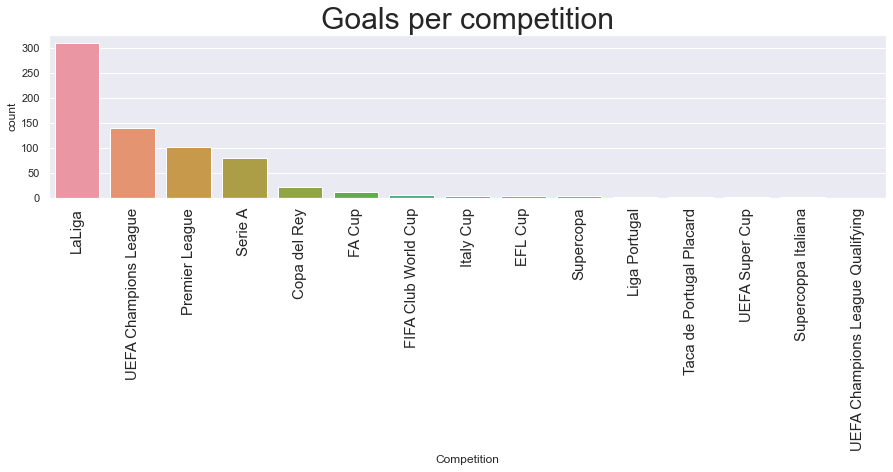

In [7]:
sns.set(rc={'figure.figsize':(15,3)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Competition'],order=df.Competition.value_counts().sort_values(ascending=False).index)
p.axes.set_title("Goals per competition",fontsize=30)

In [8]:
pd.DataFrame(df.Competition.value_counts())

,Competition
LaLiga,311
UEFA Champions League,140
Premier League,102
Serie A,81
Copa del Rey,22
FA Cup,13
FIFA Club World Cup,7
Supercopa,4
EFL Cup,4
Italy Cup,4


# Goals Per Season

Text(0.5, 1.0, 'Goals per season')

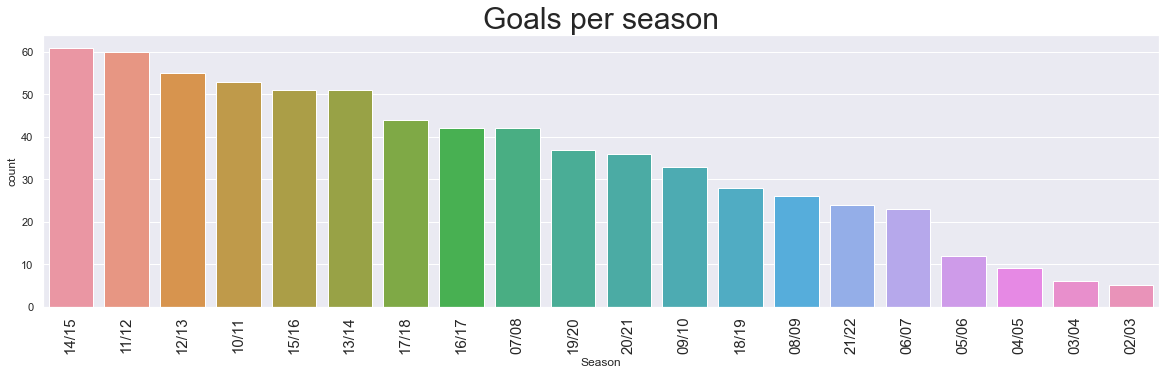

In [9]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Season'],hue_order=df.groupby('Competition'),order=df.Season.value_counts().sort_values(ascending=False).index)
p.axes.set_title("Goals per season",fontsize=30)

 # Goals Per Clubs

Text(0.5, 1.0, 'Goals per Clubs Played')

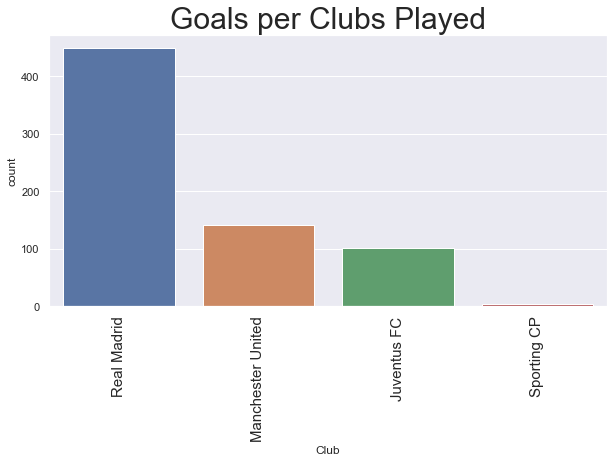

In [10]:
sns.set(rc={'figure.figsize':(10,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Club'],hue_order=df.groupby('Club'),order=df.Club.value_counts().sort_values(ascending=False).index)
p.axes.set_title("Goals per Clubs Played",fontsize=30)

# Goals Per Playing Position

Text(0.5, 1.0, 'Goals per Playing Position')

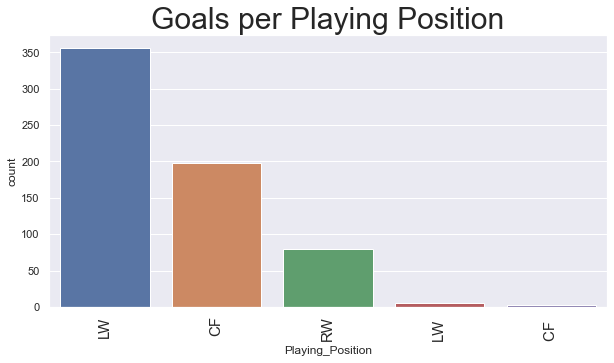

In [11]:
sns.set(rc={'figure.figsize':(10,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Playing_Position'],hue_order=df.groupby('Competition'),order=df.Playing_Position.value_counts().sort_values(ascending=False).index)
p.axes.set_title("Goals per Playing Position",fontsize=30)

# Goals Per Game Minute

In [12]:
mins=list(map(str, range(1,121)))
mins.insert(45,"1stE")
mins.insert(91,"2ndE")
mins.insert(122,"ExtE")
df.loc[df.Minute.str[:3]=='45+', 'Minute'] = '1stE'
df.loc[df.Minute.str[:3]=='90+', 'Minute'] = '2ndE'
df.loc[df.Minute.str[:4]=='120+', 'Minute'] = 'ExtE'
mins1=mins[:23]
mins2=mins[23:46]
mins3=mins[46:69]
mins4=mins[69:92]
mins5=mins[92:]


Text(0.5, 1.0, 'Goals per Game Minute (1-23)')

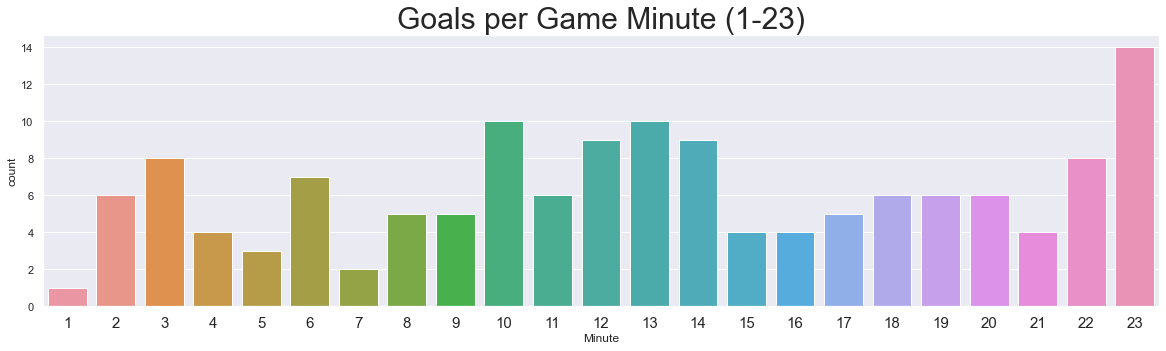

In [13]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15)
p=sns.countplot(df['Minute'],order=mins1)
p.axes.set_title("Goals per Game Minute (1-23)",fontsize=30)

Text(0.5, 1.0, 'Goals per Game Minute (24-First Half Extra time)')

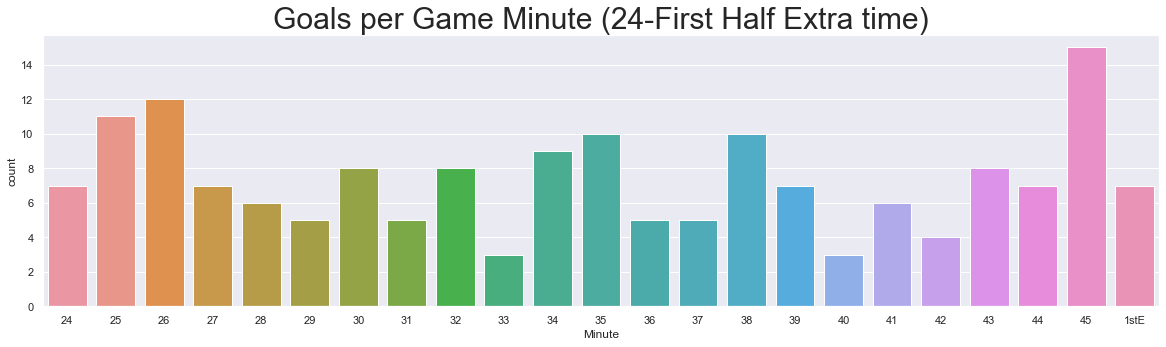

In [14]:
p=sns.countplot(df['Minute'],order=mins2)
p.axes.set_title("Goals per Game Minute (24-First Half Extra time)",fontsize=30)

Text(0.5, 1.0, 'Goals per Game Minute (46-68)')

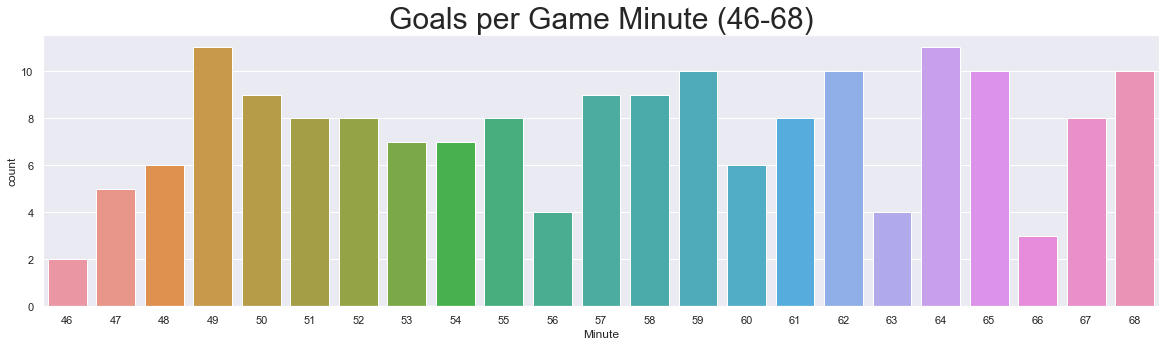

In [15]:
p=sns.countplot(df['Minute'],order=mins3)
p.axes.set_title("Goals per Game Minute (46-68)",fontsize=30)

Text(0.5, 1.0, 'Goals per Game Minute 69- 2nd Half Extra time)')

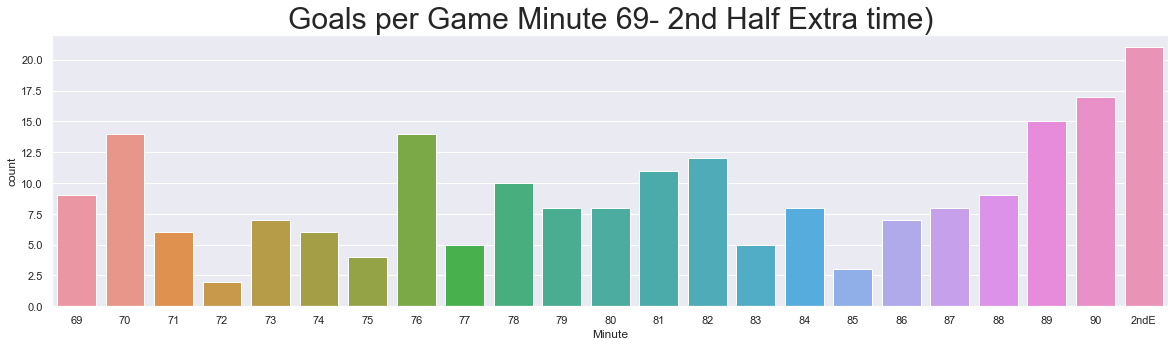

In [16]:
p=sns.countplot(df['Minute'],order=mins4)
p.axes.set_title("Goals per Game Minute 69- 2nd Half Extra time)",fontsize=30)

Text(0.5, 1.0, 'Goals per Game Minute (91-Extra times)')

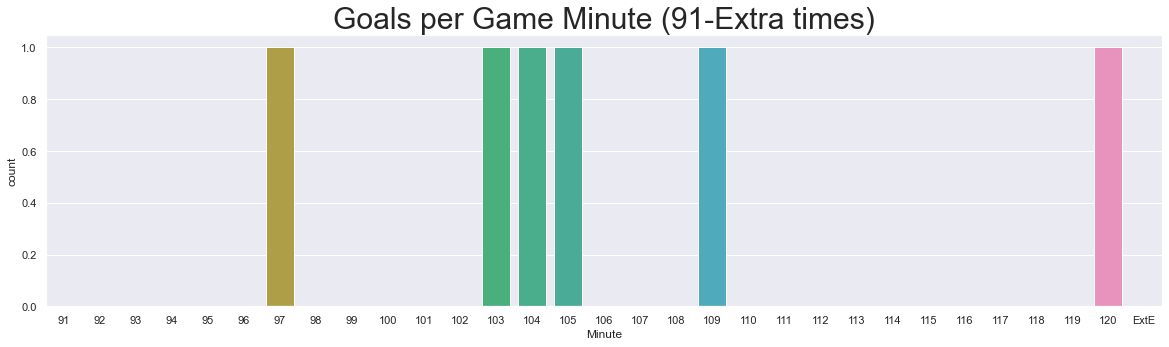

In [17]:
p=sns.countplot(df['Minute'],order=mins5)
p.axes.set_title("Goals per Game Minute (91-Extra times)",fontsize=30)

 # Goals per Type_of_goal

Text(0.5, 1.0, 'Goals Per Type Of Goal Scored')

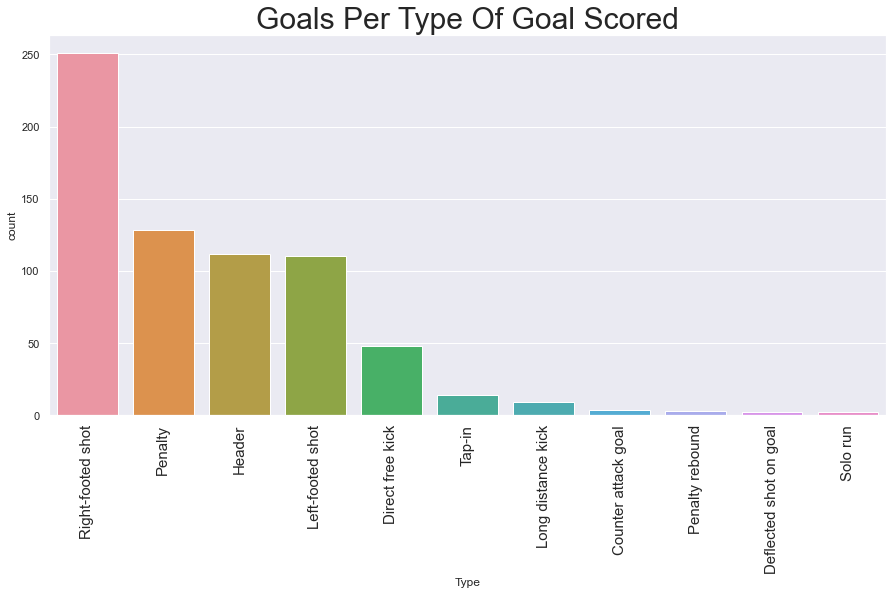

In [18]:
sns.set(rc={'figure.figsize':(15,7)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Type'],hue_order=df.groupby('Type'),order=df.Type.value_counts().sort_values(ascending=False).index)
p.axes.set_title("Goals Per Type Of Goal Scored",fontsize=30)

 # Favourite Opponents

<BarContainer object of 7 artists>

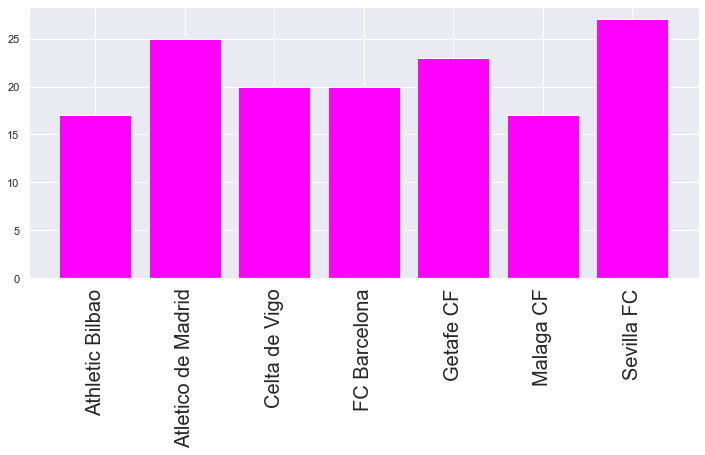

In [22]:
sns.set(rc={'figure.figsize':(12,5)})
opponents_df=df.groupby('Opponent').size().reset_index(name='count')
fav_opponents_df=opponents_df[opponents_df["count"]>15]
plt.xticks(fontsize=20,rotation='vertical')
plt.bar(x=fav_opponents_df['Opponent'],height=fav_opponents_df['count'],color="magenta")

# Goals Assisted By Others

Text(0.5, 1.0, 'Goals Assist')

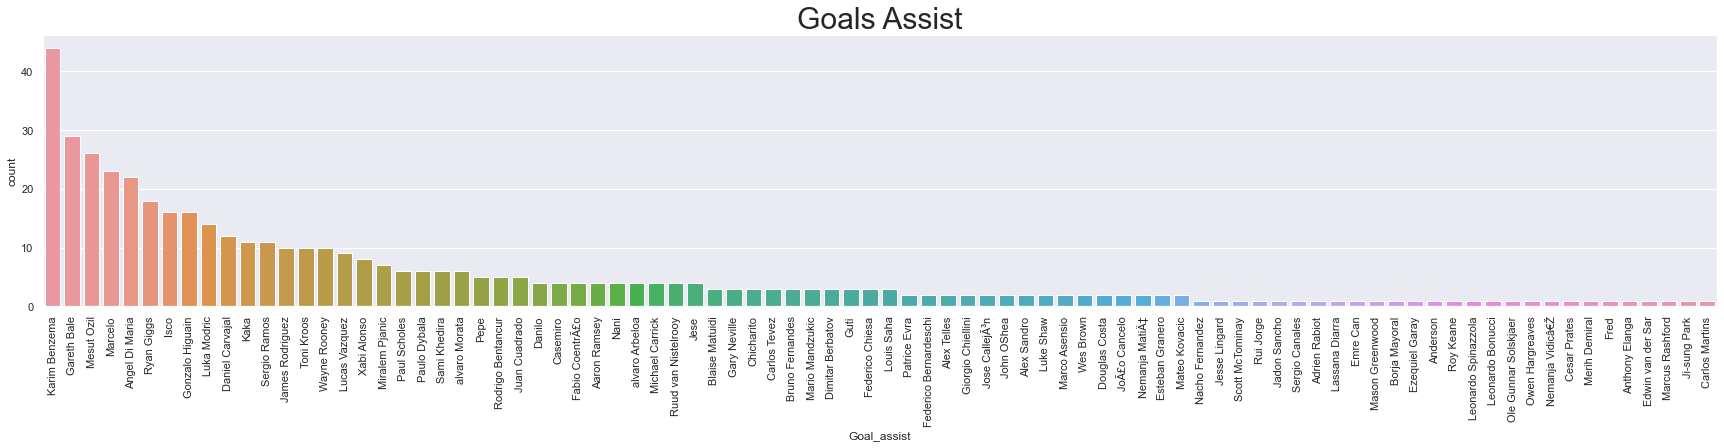

In [20]:
sns.set(rc={'figure.figsize':(30,5)})
plt.xticks(rotation='vertical')
p=sns.countplot(df['Goal_assist'],order=df.Goal_assist.value_counts().sort_values(ascending=False).index)
p.axes.set_title("Goals Assist",fontsize=30)